Implement Hermite interpolation using divided differences:  find
$ p ∈ P^{2n+1}$ such that $p(x_i) =f(x_i)$ and $p′(x_i) =f′(x_i)$ for $i= 0...n$. Test your implementation for $f(x) = sin(x)$, and $x_0= 0,x_1=\pi/2,x_2=\pi$. You can start from the notebook NewtonInterpolation.ipynb provided in the lecture.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

def NewtonInterpol (pts, vals, derivatives=None):
    """
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences
    """
    
    if derivatives is not None:
        pts = [val for val in pts for _ in (0, 1)]
        vals = [val for val in vals for _ in (0, 1)]
    
    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            # print ("i =",i, ", j =",j)
            if pts[j] == pts[j-i-1]:
                dd[j] = derivatives[int(j/2)]
            else:
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd


def Horner (pts, dd, x):
    """
    Horner scheme for polynomial evaluation in Newton basis
    """
    
    if len(dd) == 2*len(pts):
        pts = [val for val in pts for _ in (0, 1)]
    
    n = len(pts)-1
    sum = dd[n]
    for i in range(n-1, -1, -1):
        sum = sum * (x-pts[i]) + dd[i]
    return sum


6


Text(0.5, 1.0, 'Interpolation Error')

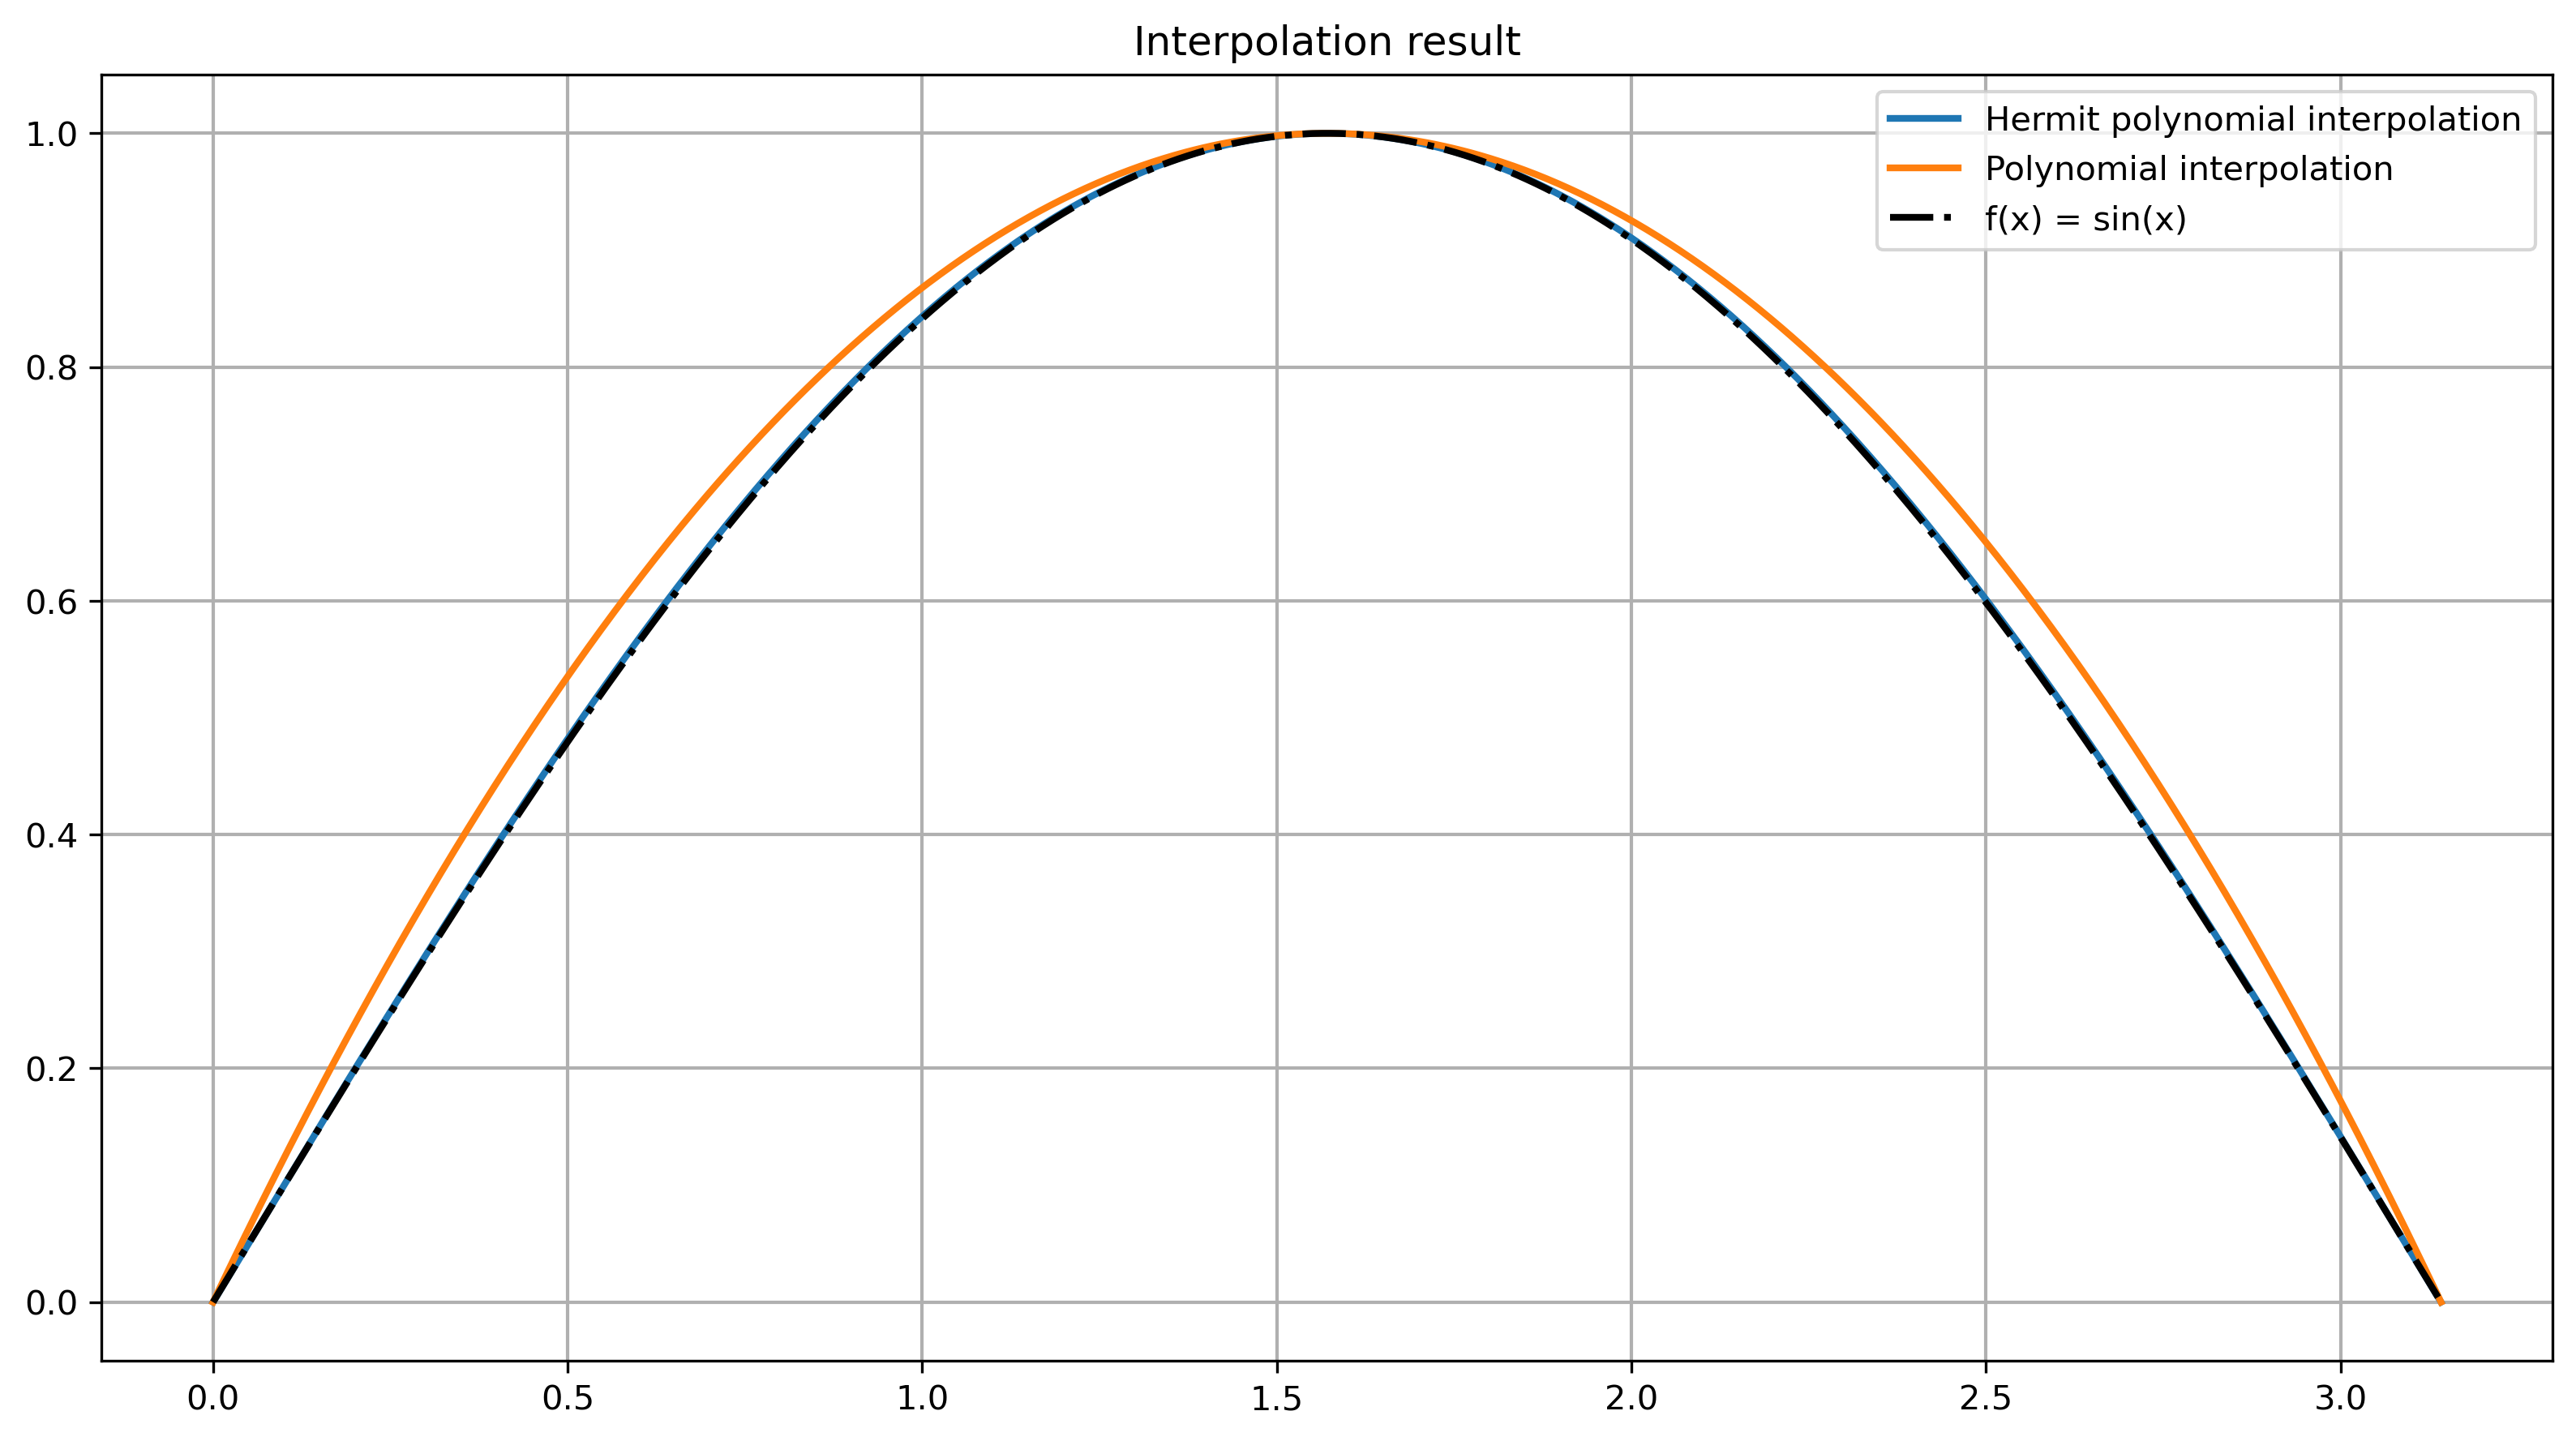

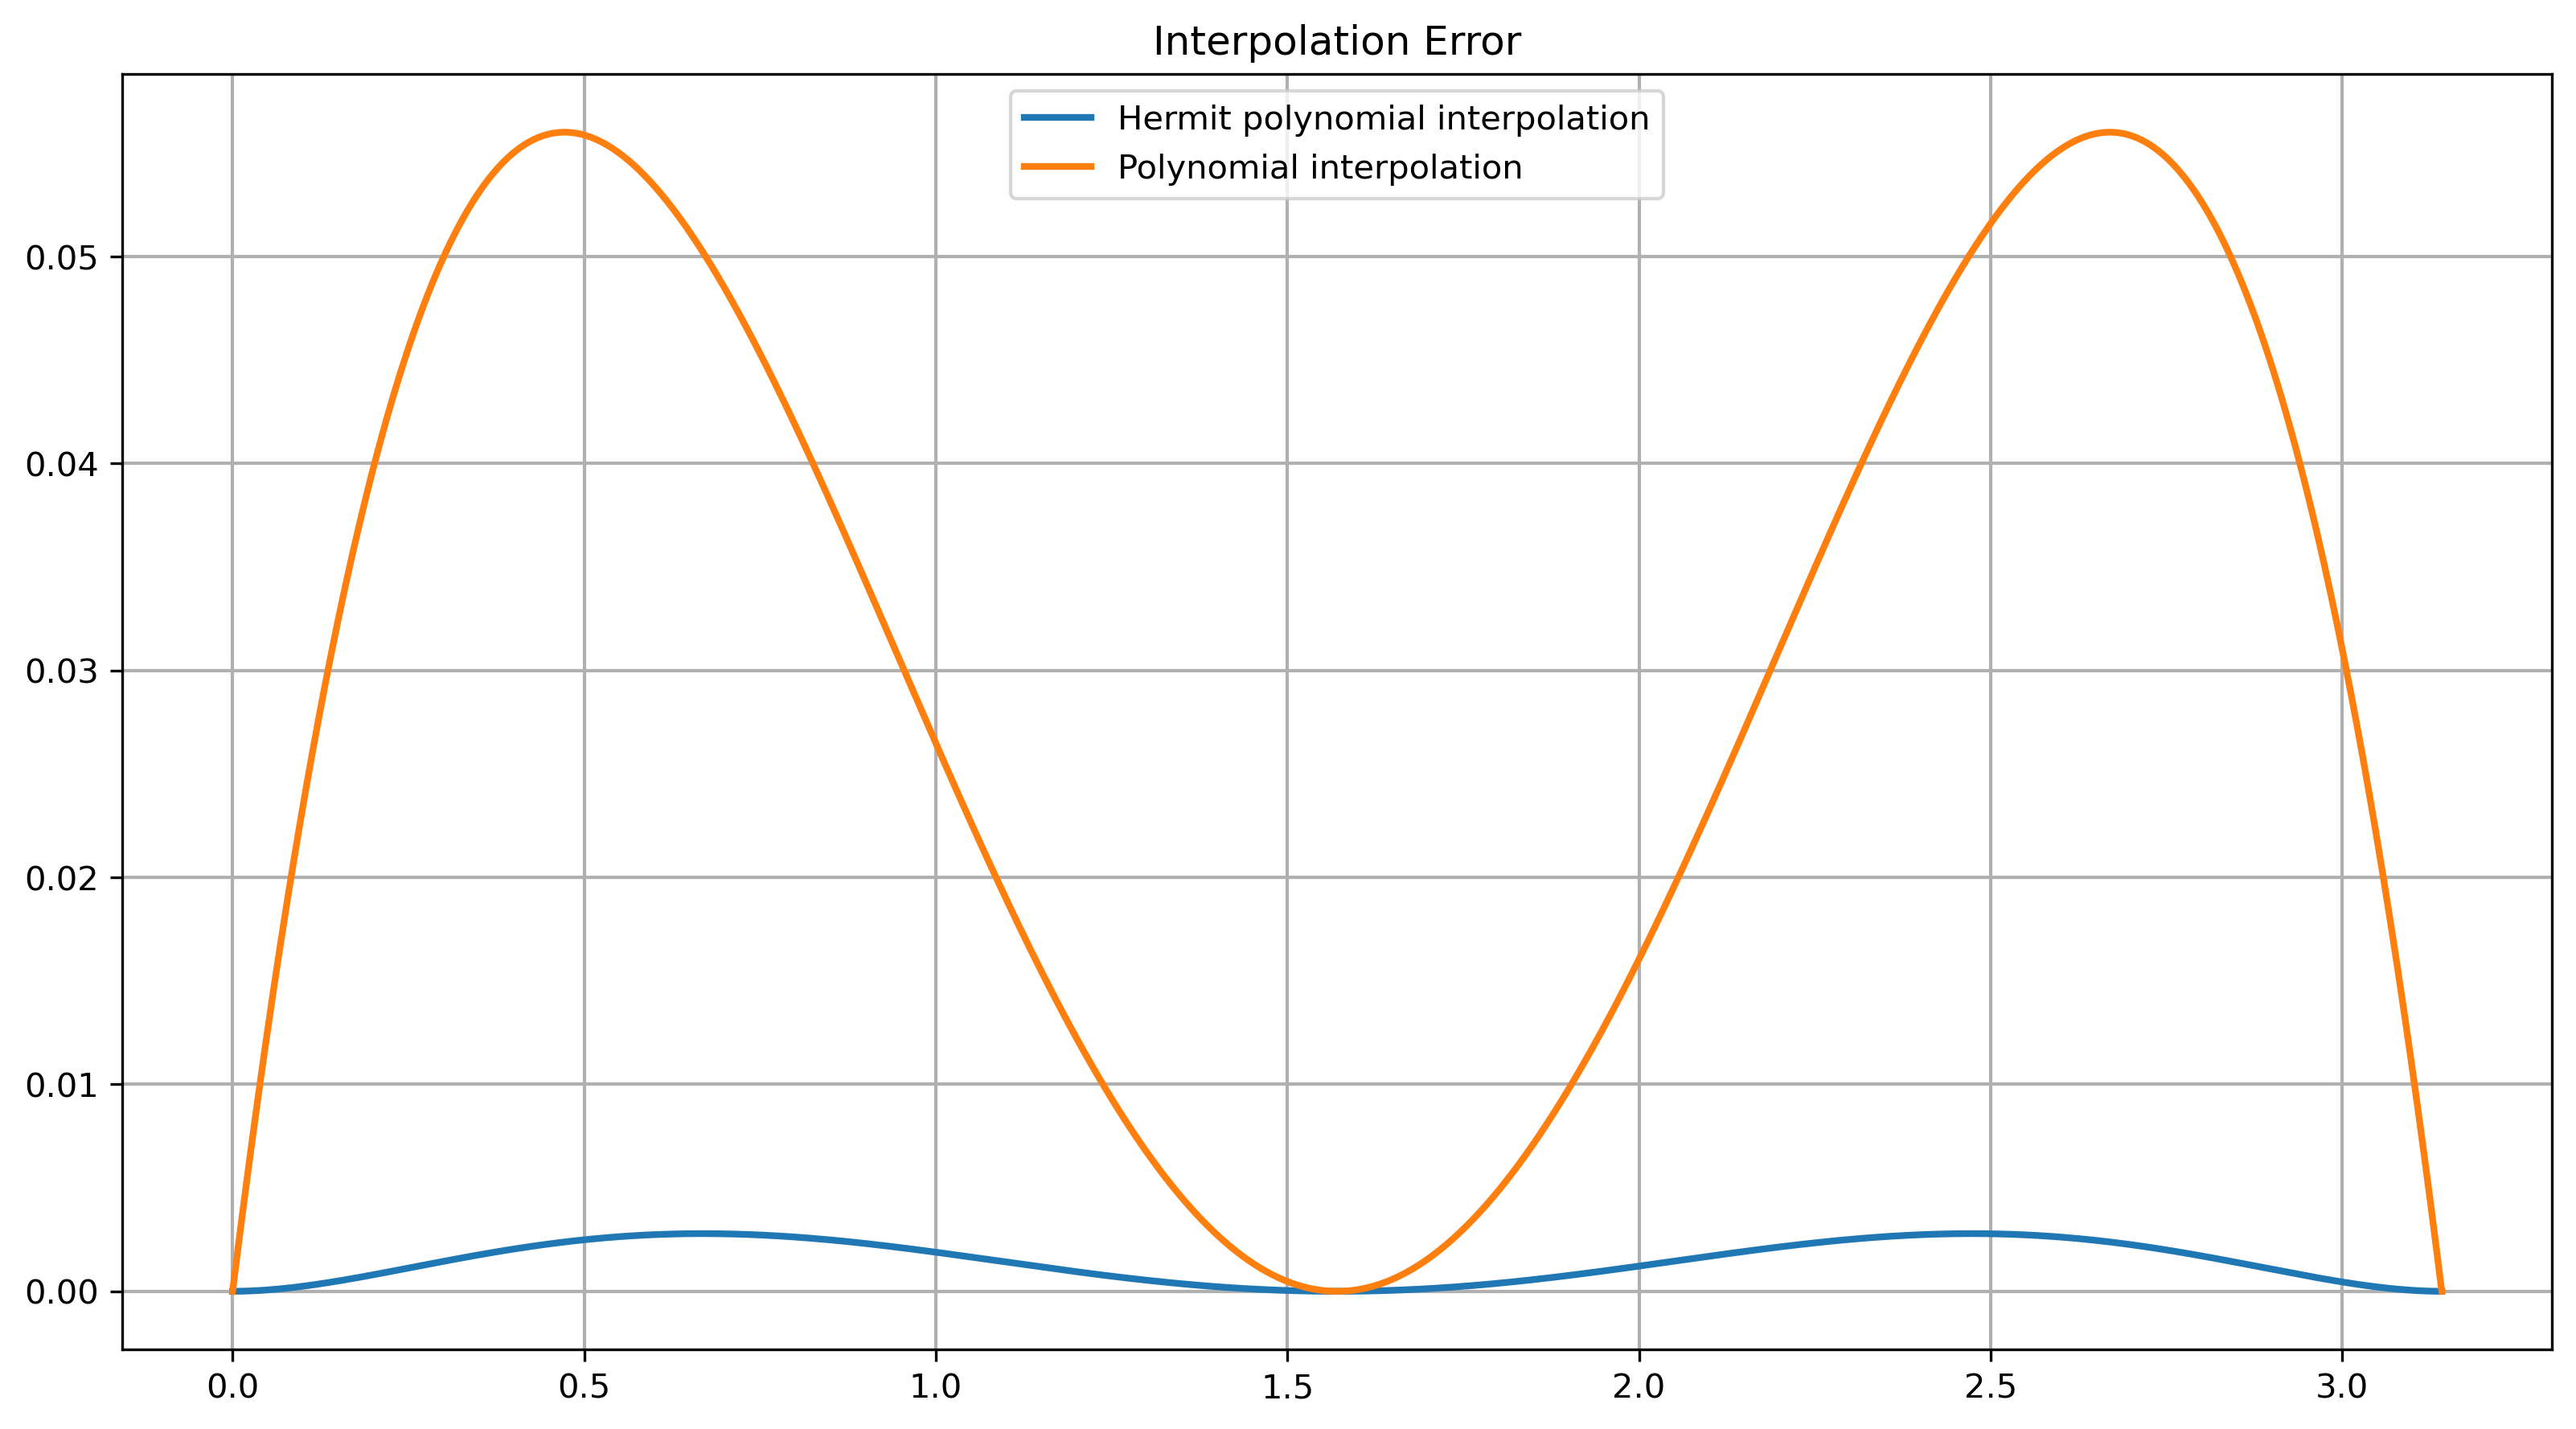

In [81]:
x_knots = np.array([0, np.pi/2, np.pi])
y_values = np.array([0, 1, 0], float)
derivaitves = np.array([1, 0, -1], float)

dd = NewtonInterpol(x_knots, y_values, derivaitves)
dd2 = NewtonInterpol(x_knots, y_values)

print(len(dd))

x_plot = np.linspace(0, np.pi, 1000)
y_plot = Horner(x_knots, dd, x_plot)
y_plot2 = Horner(x_knots, dd2, x_plot)

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_plot, label="Hermit polynomial interpolation")
plt.plot(x_plot, y_plot2, label='Polynomial interpolation')
plt.plot(x_plot, np.sin(x_plot), '-.k', label='f(x) = sin(x)')
plt.grid()
plt.legend()
plt.title("Interpolation result")

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_plot - np.sin(x_plot), label="Hermit polynomial interpolation")
plt.plot(x_plot, y_plot2 - np.sin(x_plot), label='Polynomial interpolation')
plt.grid()
plt.legend()
plt.title("Interpolation Error")